<a id='top'></a>

# Homework 5: Bootstrap, Hypothesis Testing and Regression
***

**Name**: Dennis Lim

***

This assignment is due on Canvas by **11:59 PM on Friday November 22**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas, as well as in the zipped folder in which you obtained this assignment. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- You **MUST** leave all of your notebook cells **evaluated** so the graders do not need to re-evaluate them. For 100+ students, this extra time adds up, and makes the graders' lives unnecessarily more difficult.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) 

---

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats 
%matplotlib inline

---
[Back to top](#top)
<a id='p1'></a>

### [20 points] Problem 1 - Hypothesis Testing: Knowledge Check

You are working as a Data Scientist for an internet company. Your co-worker, Bob Dob, is a lovable scamp! Unfortunately, he also makes a lot of mistakes throughout the day as the two of you team up to tackle some inference work regarding your company's customers. In each case, clearly explain why Bob's hypothesis testing setup or conclusion is incorrect.

**Part A**: Bob has some data on the characteristics of customers that visited the company's website over the previous month.  He wants to perform an analysis on the proportion of last month's website visitors that bought something.  

Let $X$ be the random variable describing the number of website visitors who bought something in the previous month, and suppose that the population proportion of visitors who bought something is $p$. Bob is particularly interested to see if the data suggests that more than 15% of website visitors actually buy something.  He decides to perform the test with a null hypothesis of $H_0: \hat{p} = 0.15$. 

This is an incorrect null hypothesis because we are not looking at the p-val to compare but the acutally probability, so instead we are using $H_0 : p = 0.15$ as our null hypothesis

**Part B**: Bob decides instead to do his hypothesis test with a null hypothesis of $H_0: p > 0.15$.

This is incorrect because the null hypothesis should have an equal sign and not an inequality, The alternative hypothesis is the one for which we are seeking statistical evidence so we use inequallity

**Part C**: Finally on track with reasonable hypotheses of $H_0: p = 0.15$ and $H_1: p > 0.15$, Bob computes a normalized test-statistic of $z = -1.4$ for the sample proportion and concludes that since $z = -1.4 < 0.05$ there is sufficient statistical evidence at the $\alpha = 0.05$ (95%) significance level that the proportion of customers who buy something is less than 15%.

$z_{critical} = $ stats.norm.ppf(.95 + .05/2) = 1.96

we know that our z is -1.4, so the reject region is anything above 1.96 or belove -1.96 and because -1.4 > -1.96, it does not fall in th reject region so we fail to reject the null hypothesis

**Part D**: Bob is again conducting the hypothesis test of $H_0: p = 0.15$ and $H_1: p > 0.15$. He computes a p-value of $0.03$, and thus concludes that there is only a 3% probability that the null hypothesis is true. 

p-value is the probability under the null hypothesis that we would get a test statistic at least as extreme as the one we calculated, 
so it doesn't represent the probabilty of the null hypothesis, but acutally we use it to comapre with $\alpha$ to see if we can reject the null hypothesis 

---
[Back to top](#top)
<a id='p3'></a>

### [25 points] Problem 2 - Naps vs Coffee for Memory? 

It is estimated that [about 75% of adults](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4997286/) in the United States drink coffee. Often, coffee is used to replace the need for sleep. It works alright, or so we think. Let's find out, in this exciting homework problem!

[One recent study](https://www.sciencedirect.com/science/article/pii/S1388245703002554) investigated the effects of drinking coffee, taking a nap, and having a ["coffee-nap"](https://lifehacker.com/naps-vs-coffee-which-is-better-when-youre-exhausted-1730643671) - the practice of drinking some coffee *and then* having a short nap. The study broke participants up into three groups of 15 participants each, where the groups would have a nap, or have a coffee, or have a coffee-nap, then perform a task where their reaction time was measured. In previous experiments the mean reaction time measurement was found to be normally distributed. The reaction time means (milliseconds, ms) and standard deviations for the three groups of participants are given in the table below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Coffee+Nap} & 15 & 451.3 & 31.9 \\ 
\textrm{Coffee} & 15 & 494.2 & 39.6 \\ 
\textrm{Nap} & 15 & 492.8 & 45.2 \\ 
\end{array}
$$

**Part A**: Compute a 97.5% t-confidence interval for the mean reaction time measurement for participants in each of these three groups. (You should find three separate confidence intervals.) Report the results.

1. Can you make any conclusions regarding whether coffee, naps or both (coffee-naps) are better for faster reaction times?
2. Why did we use a t-distribution?

In [99]:
def CI_t(x_bar, std_dev, n = 15):
    t = stats.t.ppf(1 - (.025)/2, df = n - 1)
    return x_bar - t * (std_dev/np.sqrt(n)), x_bar + t * (std_dev/np.sqrt(n))
group = ['Coffee + Nap', 'Coffee', 'Nap']
x_bar = [451.3, 494.2, 492.8]
std_dev = [31.9, 39.6, 45.2]

for i in range(len(group)):
    l, u = CI_t(x_bar[i], std_dev[i])
    print("%s CI [%d, %d]" % (group[i], l, u))


Coffee + Nap CI [430, 471]
Coffee CI [468, 519]
Nap CI [463, 522]


If we take a look at all the intervals, they all are intertwined, so we can not make an acutal conculsion regarding whether coffee, naps, or both are better for faster reaction time

we used the t-distribution because n < 30

$$\bar x \pm t_{\alpha/2} * \frac{s}{\sqrt n}$$

**Part B**: Use an appropriate hypothesis test to determine if there sufficient evidence, at the $\alpha = 0.025$ significance level, to conclude that taking a nap promotes faster reaction time than drinking coffee.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

In [100]:
t_critical = stats.t.ppf(0.025, df = 28)
print(t_critical)
n = 15

T_ts = (x_bar[2] - x_bar[1]) / np.sqrt((std_dev[2]**2/n)+(std_dev[1]**2/n))
print(T_ts)

-2.048407141795244
-0.09022936362055636


$H_o: \mu_{nap} - \mu_{coffee} = 0$

$H_a: \mu_{nap} - \mu_{coffee} < 0$

because our T_ts is greater than our critical region, we cannot reject our null hypothesis 


**Part C**: Use an appropriate hypothesis test to determine if there is sufficient evidence, at the $\alpha = 0.025$ significance level, to conclude that taking a coffee-nap promotes faster reaction time than only drinking coffee, or only having a nap.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

In [101]:
T_ts = (x_bar[0] - x_bar[1]) / np.sqrt((std_dev[0]**2/n)+(std_dev[1]**2/n))
print(T_ts)

-3.2674426640629344


$H_o: \mu_{coffee-nap} - \mu_{coffee} = 0$

$H_a: \mu_{coffee-nap} - \mu_{coffee} < 0$

Because our T_ts is less than our critical region, we can reject our null hypothesis and we can conclude that coffee and naps promote faster reaction time than drinking coffee

In [102]:
# coffee-nap versus nap

T = (x_bar[0] - x_bar[2]) / np.sqrt((std_dev[0]**2/n)+(std_dev[2]**2/n))
print(T)

-2.9052726242057902


$H_o: \mu_{coffee-nap} - \mu_{nap} = 0$

$H_a: \mu_{coffee-nap} - \mu_{nap} < 0$

Because our T_ts is less than our critical region, we can reject our null hypothesis and we can conclude that coffee and naps promote faster reaction time than just naps

**Part D**: Compute a 97.5% confidence interval for the standard deviation of reaction time for coffee-nap takers. Do all computations in Python, and report the results.

In [103]:
alpha = 1 - .975
df = n -1
chi = [stats.chi2.ppf(alpha/2, df), stats.chi2.ppf(1 - alpha/2, df)]
var = std_dev[0]**2
bounds = []
for i in chi:
    bounds.append(np.sqrt(df * var/i))

print("97.5%% CI for std dev of reaction time for coffee nap takers [%f, %f]" %(bounds[1], bounds[0]))

97.5% CI for std dev of reaction time for coffee nap takers [22.388647, 54.068809]


---
[Back to top](#top)
<a id='p4'></a>

### [25 points] Problem 3 - Bad Science for Fun and Profit 

[Data Dredging](https://en.wikipedia.org/wiki/Data_dredging) and [p-hacking](https://www.explainxkcd.com/wiki/index.php/882:_Significant) are umbrella terms for the dangerous practice of automatically testing a large number of hypotheses on the entirety or subsets of a single dataset in order to find statistically significant results. In this exercise we will focus on the idea of testing hypotheses on subsets of a single data set.  

Nefaria Octopain has landed her first data science internship at an aquarium.  Her primary summer project has been to design and test a new feeding regimen for the aquarium's octopus population. To test her regimen, her supervisors have allowed her to deploy her new feeding regimen to 4 targeted octopus subpopulations of 40 octopuses each, every day, for a month. 

The effectiveness of the new diet is measured simply by the rate at which the food is consumed, which is simply defined to be the _proportion_ of octopuses that eat the food (POOTEF). The aquarium's standard octopus diet has a POOTEF of $0.90$.  Nefaria is hoping to land a permanent position at the aquarium when she graduates, so she's **really** motivated to show her supervisors that the POOTEF of her new diet regimen is a (statistically) significant improvement over their previous diet. 

The data from Nefaria's summer experiment can be found in `pootef.csv`. Load this dataset as a Pandas DataFrame. 

In [104]:
df = pd.read_csv("pootef.csv")
df

,Group,Date,Fed,Ate
0,1,Oct 1 2018,40,37
1,1,NaN,40,37
2,1,NaN,40,35
3,1,NaN,40,35
4,1,Oct 5 2018,40,36
5,1,NaN,40,36
6,1,Oct 7 2018,40,34
7,1,NaN,40,37
8,1,Oct 9 2018,40,35
9,1,NaN,40,34


**Part A**: State the null and alternate hypotheses that Nefaria should test to see if her new feeding regimen is an improvement over the aquarium's standard feeding regimen with a POOTEF of $0.90$.

H_o: p = . 90

H_a: p > .90

**Part B**: Complete the function below to test the hypothesis from **Part A** at the $\alpha = 0.05$ significance level using a p-value test. Is there sufficient evidence for Nefaria to conclude that her feeding regimen is an improvement? 

In [105]:
def z_test(bites, feedings, alpha=0.05):
    '''
    Function to test H1: p > 0.90 
    Returns p-value based on H0: p=0.90 
    '''
    
    p_hat = np.sum(bites)/np.sum(feedings)
    p = .9
    
    z = (p_hat - p)/np.sqrt(p*(1-p)/np.sum(feedings))
    
    return 1 - stats.norm.cdf(z)

z_test(df['Ate'], df['Fed'])

0.30131168747623693

because our p_value is lower than our alpha/critcal region, we cannot reject our null hypothesis 

**Part C**: Bummer, Nefaria thinks. This is the part where she decides to resort to some questionable science.  Maybe there is a reasonable _subset_ of the data for which her alternative hypothesis is supported?  Can she find it?  Can she come up for a reasonable justification for why this subset of the data should be considered while the rest should be discarded? 

Here are the **rules**: Nefaria cannot modify the original data (e.g. by adding nonexistent feedings or bites to certain groups or days) because her boss will surely notice.  Instead she needs to find a subset of the data for which her hypothesis is supported by a p-value test at the $\alpha = 0.05$ significance level _and_ be able to explain to her supervisors why her sub-selection of the data is reasonable.  

In addition to your explanation of why your successful subset of the data is potentially reasonable, be sure to thoroughly explain the details of the tests that you perform and show all of your Python computation. 

In [106]:
for i in range(1, 5):
    n_df = df.loc[df['Group'] == i]
    print(i, z_test(n_df['Ate'], n_df['Fed']))


print("WITH DROP DATA")
df = df.dropna()
for i in range(1, 5):
    n_df = df.loc[df['Group'] == i]
    print(i, z_test(n_df['Ate'], n_df['Fed']))


1 0.5377076760985439
2 0.011547866308733501
3 0.6475228469417464
4 0.7755596672461562
WITH DROP DATA
1 0.6039263041020528
2 0.00187324045264603
3 0.8333033746459644
4 0.9359267193671605


so the first run is with the raw data and the 2nd run is when drop the Nan from our data, but what we can see is that the group that we can reject our null hypothesis is group 2, meaning that Nefaria's feed regiment works in that group specifically. 

<br>

---
[Back to top](#top)
<a id='p3'></a>

### [30 points] Problem 4 - Simple Linear Regression for Science!

From [Google Trends](https://trends.google.com/trends/?geo=US) data, it appears that interest in "data science" in the United States has steadily increasing since 2004. Interest is measured relative to the maximum rate of Google searches for that term over the time period (so the maximum is 100). 

**Part A:** Load up the data in `data_science_interest.csv` into a Pandas DataFrame. Create two new columns:
* `Year` should be the year associated with that data point, and
* `Month` should be the month (1-12) associated with that data point.

Then, make a **scatter plot** (using `pyplot.scatter`) of all of the data points, showing how interest in "data science" has evolved over time. Label the x-axis by year, displaying ticks for Janurary of each year between 2004 and 2019. 

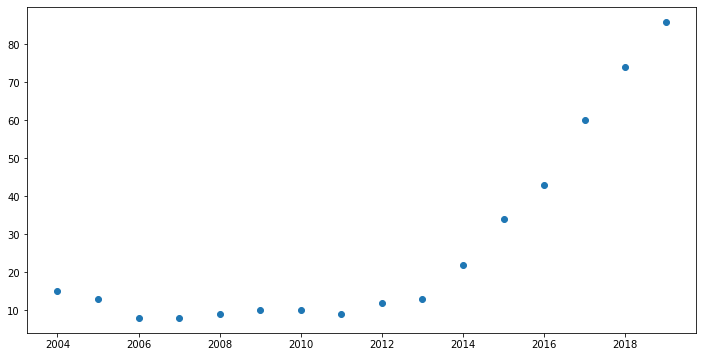

In [107]:
filepath = "data_science_interest.csv"

df = pd.read_csv(filepath)
date = np.array(df['Month'])
year = np.array([])
month = np.array([])

for i in range(len(date)): 
    loc = date[i].index('-')
    month = np.append(month, int(date[i][loc + 1:]))
    year = np.append(year, int(date[i][:loc]))

df['Month'] = month
df['Year'] = year

plt.figure(figsize=(12, 6))
# jan_df = pd.DataFrame()
year = list(df[df['Month'] == 1]['Year'])
interest = list(df[df['Month'] == 1]['Interest'])

# fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12,4))

# jan_df.plot.scatter(x = 'x', y = 'y', ax = ax)
plt.scatter(year, interest)




**Part B:** These data (and the sea-level data from Homework 4) are a **time series**, where the independent variable is *time* and the dependent quantity is interest in data science. One of the central assumptions of linear regression is that the data are observations generated by some process, independently of one another. With time series data, we need to be careful because there could be some other process affecting the output data. In particular, **annual cycles** are patterns that reoccur each year and are frequently present in time series data. For example, seasonal patterns of weather are annual cycles.

To see what kind of effect time has, make a **line plot** (using `pyplot.plot`) of the interest in data science, as a function of time. Again, include all of the data points and, for the x-axis, label only the tick marks associated with January of each year, and be sure to label your axes.

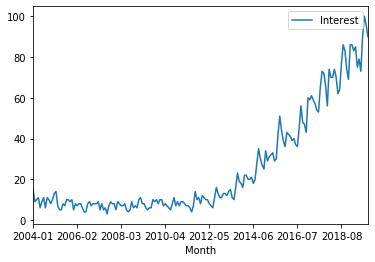

<Figure size 864x432 with 0 Axes>

In [112]:
df = pd.read_csv(filepath)
df.plot(x = 'Month', y = 'Interest')

df = pd.read_csv(filepath)
date = np.array(df['Month'])
year = np.array([])
month = np.array([])

for i in range(len(date)): 
    loc = date[i].index('-')
    month = np.append(month, int(date[i][loc + 1:]))
    year = np.append(year, int(date[i][:loc]))

df['Month'] = month
df['Year'] = year

plt.figure(figsize=(12, 6))
# jan_df = pd.DataFrame()
year = list(df[df['Month'] == 1]['Year'])
interest = list(df[df['Month'] == 1]['Interest'])


**Part C:** Does your plot from Part B suggest that there is some annual cycle to the interest in data science? During which months is interest in data science highest? What about lowest? Justify your answers using your plot, **and** by computing the mean interest in data science for each month. So, compute 12 values and report them in a markdown table. Do **not** just spit out a horizontal list of 12 numbers. That would be yucky to try to read, and we're scientists.

What do you think accounts for the increased interest in data science during the fall months?

In [117]:
m = np.array([])
month_mean = np.array([])
for i in df['Month']:
    if(i not in m):
        m = np.append(m, i)
        
for i in m:
    month_mean = np.append(month_mean, np.mean(df[df['Month'] == i]['Interest']))

m_df = pd.DataFrame()
m_df['Month'] = m
m_df['Interest'] = month_mean 

m_df


,Month,Interest
0,1.0,26.625000
1,2.0,25.562500
2,3.0,24.250000
3,4.0,24.687500
4,5.0,23.062500
5,6.0,21.625000
6,7.0,21.000000
7,8.0,26.937500
8,9.0,32.687500
9,10.0,29.437500


Well it looks like from part b there are two different annual cycle to interest in Data Science, before 2013 it looks like there was less intrest in DS and after there is starting increase of intrest in DS. From the mean intrest of each month it looks like there is no different anual cycles, because the means of intrest are all similar




**Part D:** (Spoiler alert!) Since there seems to be an annual cycle, one of the fundamental assumptions of our simple linear regression model is not satisfied. Namely, it is not the case that the model-data residuals, $\epsilon_i$, are independent of one another.

So, we need to process our data a bit further before fitting a regression model. One way to address this is to take the mean of all the data each year and use for analysis the time series of annual mean interest in data science. Create a new Pandas DataFrame that consists only of two columns:
* `year`, and
* `interest`, the mean interest in data science from the twelve months in that year.

In [118]:
years = np.array([])
interest_mean = np.array([])
for i in df['Year']:
    if(i not in years):
        years = np.append(years, i)
for i in years:
    interest_mean = np.append(interest_mean, np.mean(df[df['Year'] == i]['Interest']))

linear_df = pd.DataFrame()
linear_df['Year'] = years
linear_df['Interest'] = interest_mean
print(linear_df)

      Year   Interest
0   2004.0   9.666667
1   2005.0   8.583333
2   2006.0   7.083333
3   2007.0   6.750000
4   2008.0   6.750000
5   2009.0   8.083333
6   2010.0   7.916667
7   2011.0   8.333333
8   2012.0  10.500000
9   2013.0  15.000000
10  2014.0  24.000000
11  2015.0  35.833333
12  2016.0  43.083333
13  2017.0  61.250000
14  2018.0  72.750000
15  2019.0  85.727273


**Part E:** Perform a simple linear regression with `year` as the feature and `interest` as the response (mean annual interest in data science).  Report the estimated regression model in the form $Y = \alpha + \beta x$. Do all computations in Python. 

Then make a scatter plot of the mean annual interest in data science as a function of year, and overlay the estimated regression line. Label your axes and provide a legend.

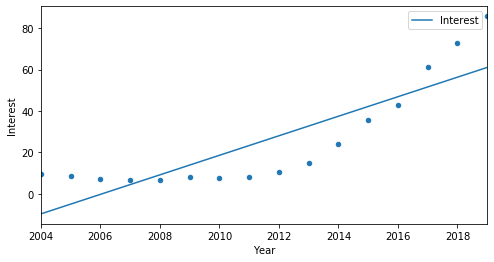

In [119]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,4))
linear_df.plot.scatter(x = 'Year', y = 'Interest', ax = ax)

x_bar = np.mean(linear_df['Year'])
x_bar_2 = x_bar**2
x_2_bar = np.mean(linear_df['Year']**2)
y_bar = np.mean(linear_df['Interest'])
xy_bar = np.mean(linear_df['Year'] * linear_df['Interest'])

beta = (xy_bar - x_bar * y_bar)/(x_2_bar - x_bar_2)

alpha = y_bar - beta * x_bar

line_df = pd.DataFrame()
line_df['Year'] = linear_df['Year']
y = alpha + beta * (linear_df['Year'])
line_df['Interest'] = y
line_df.plot(x = 'Year', y = 'Interest', ax = ax)

b_hat, a_hat, r_val, p_val, stderr = stats.linregress(linear_df["Year"], linear_df["Interest"])
# print(stats.linregress(linear_df["Year"], linear_df["Interest"]))

**Part F**: Give a physical interpretation of the coefficient $\hat{\beta}$, estimated from your model. Include addressing whether the relationship between time and interest in data science is positive or negative. Fully justify your responses.

$\hat{\beta}$ is an estimate of the interest in data science from a given year

We can say that the relationship between time and interest in data science is postive because of our beta (the slope) is postive and in the graph we can see that its a postive trend

**Part G**: What interest in data science does your simple linear regression model predict in the year 2025? What about in 2050? What are potential drawbacks to this model for interest in data science (think about the minimium and maximum values for the data)? 

**Note**: From Google Trends Documentation, the "interest" variable is defined as: "Interest represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term."

In [120]:
intrest_2025 = alpha + beta * 2025
intrest_2050 = alpha + beta * 2050 

print("Interest in data science in year 2025: %f \nInterest in data science in year 2050: %f" % (intrest_2025, intrest_2050))

Interest in data science in year 2025: 89.325512 
Interest in data science in year 2050: 207.137734


The potential drawbacks to this model is that, is that it does not account if there is a decrease of intrest in the future, only gives the increase trend

**Part H:** Compute a 80% confidence interval for the slope parameter, $\beta$, ***by hand***. This means performing all calculations yourself in Python, as opposed to calling a simple Python function that gives you the result. Why is this a confidence interval for $\beta$ and not for $\hat{\beta}$?

In [123]:
alpha = 1 - .80
t = stats.t.ppf(1-alpha/2, df=len(linear_df)-2)
SSE = 0
n = len(linear_df)
for i in range(n):
    SSE += (linear_df['Interest'][i] - line_df['Interest'][i])**2


sigma = np.sqrt(SSE/(n-2))
denom = 0
for i in range(n):
    denom += (linear_df['Year'][i] - x_bar)**2

SE_beta = sigma/np.sqrt(denom)

l = beta - t*SE_beta
u = beta + t*SE_beta


print("80 %% Confidence Interval: [%f, %f] for the slope parameter Beta" % (l, u))


80 % Confidence Interval: [3.676023, 5.748954] for the slope parameter Beta


**Part I:** What proportion of the variation in mean annual interest in data science is explained by your linear regression model?

It is explained by our R^2